CSV

In [55]:
import pandas as pd

file_path = 'C:/Users/eoing/Downloads/Real_Estate_Sales_2001-2020_GL (3).csv'

data = pd.read_csv(file_path)

data.head(10)

C:\Users\eoing\AppData\Local\Temp\ipykernel_7716\2337388843.py:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,9/7/2021,Avon,245 NEW ROAD,217640,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
6,20058,2020,6/1/2021,Barkhamsted,46 RATLUM MTN RD,203530,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
7,200046,2020,1/25/2021,Beacon Falls,34 LASKY ROAD,158030,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN
9,2020360,2020,8/10/2021,Berlin,94 PERCIVAL AVE,140600,190790.0,0.736900,Residential,Single Family,NaN,NaN,NaN,NaN


OUTLIERS 

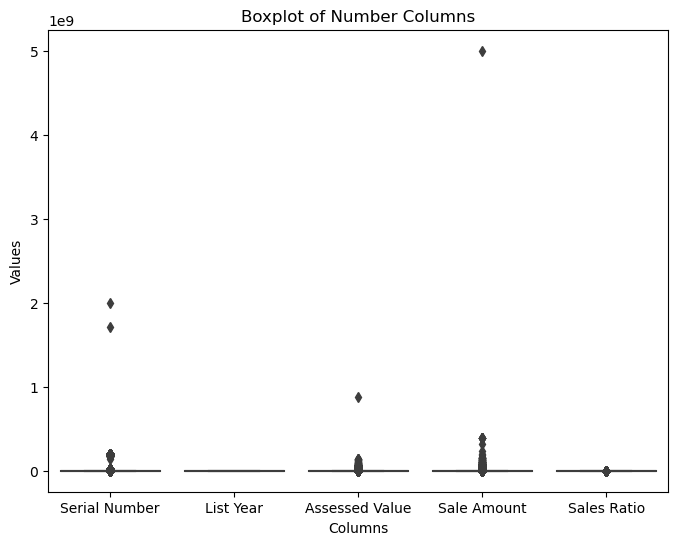

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Draw boxplots for numerical columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Number Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

#The outliers of this data set include the points in the boxplot that are far from the mean and bulk of points. 
#These points should be excluded because they affect numbers and data and make a big difference 

MISSING VALUES

In [22]:
import pandas as pd
missing_values = data.isnull().sum()
print(missing_values)
#This technique is simple but effective because it extracts the number of missing value for each column.
#The bottom six columns are high numbers becasue they are characters so there is no missing values 
#Overall there were 53 missing values between Date Recorded and Address

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


VISUALIZATION

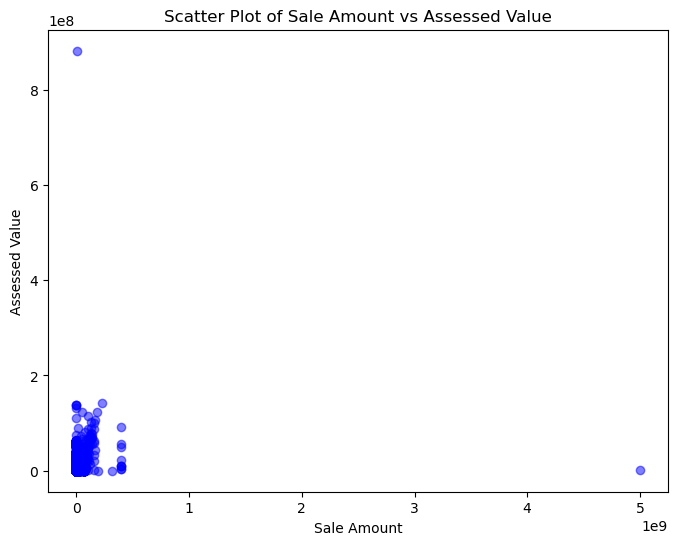

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Sale Amount'], data['Assessed Value'], color='blue', alpha=0.5)
plt.xlabel('Sale Amount')
plt.ylabel('Assessed Value')
plt.title('Scatter Plot of Sale Amount vs Assessed Value')
plt.show()
#This visualization shows a scatter plot of the two values from the dataset. The values are in millions on the x and y variables

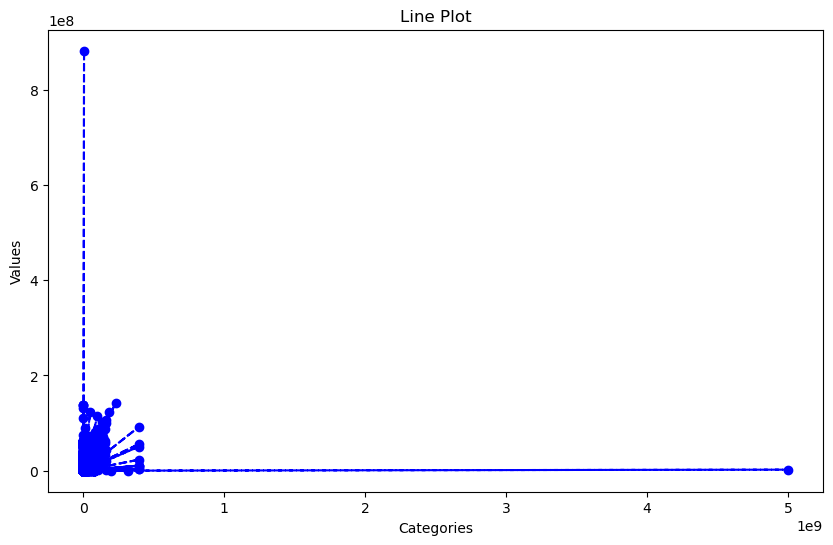

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sale Amount'], data['Assessed Value'], marker='o', color='blue', linestyle='dashed')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Line Plot')
plt.show()
#The line plot is important to look at the relationship over a period of time between the Sale Amount and Assessed Value

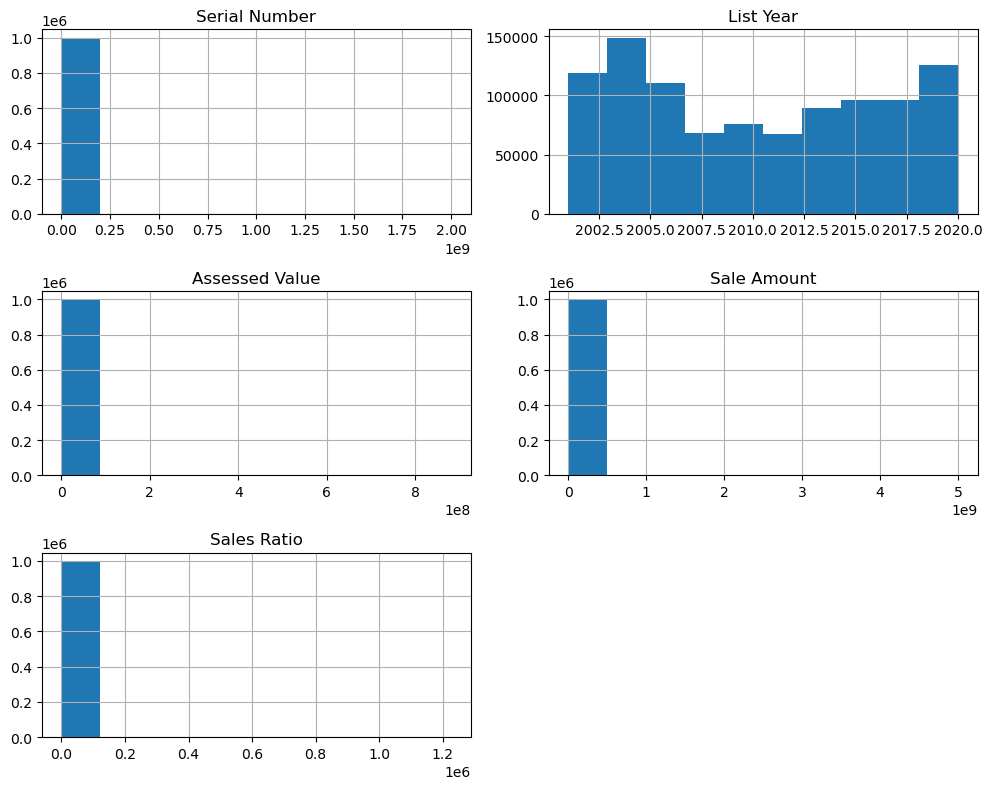

In [46]:
import matplotlib.pyplot as plt
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()
#This visualization is a histrogram on the numerical columns from the datset.

In [ ]:
TRAINING TEST SPLIT

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your target variable and independent variables
target_variable = 'Sales Ratio'
independent_variables = ['Sale Amount', 'Assessed Value']

X = data[independent_variables]
y = data[target_variable]

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(        Sale Amount  Assessed Value
 192271      88100.0           39300
 791831     317000.0          212380
 812083     124000.0           95530
 610634     150000.0          111100
 976751     165000.0          127820
 ...             ...             ...
 259178     126600.0           46200
 365838      85000.0           24350
 131932      95000.0           54150
 671155     465000.0          282900
 121958     895000.0          528710
 
 [797770 rows x 2 columns],
         Sale Amount  Assessed Value
 972291     303000.0          181860
 580711      50000.0          200100
 768231     214500.0          142300
 205832     299900.0           29220
 674744     608801.0          105000
 ...             ...             ...
 492609     217500.0          170940
 321931     462000.0          245900
 623845     335000.0          359230
 934123     231000.0          144970
 114950     731455.0          304150
 
 [199443 rows x 2 columns],
 192271    0.446084
 791831    0.669968
 812083    0